# Hand Written Digit Recognition

In [21]:
import tensorflow as tf
import tensorflow
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras.layers import Dense 
import numpy as np
import keras 
from tensorflow.keras.utils import to_categorical

In [22]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

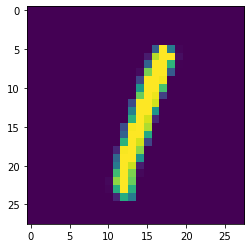

In [24]:
plt.imshow(xtest[5])

In [25]:
#flatten
xtrain=xtrain/255
xtest=xtest/255

In [26]:
xtrain=xtrain.reshape(-1,784)
xtest=xtest.reshape(-1,784)

In [27]:
model=keras.Sequential()

In [28]:
model.add(Dense(64,activation='relu',input_dim=784)) #input
model.add(Dense(64,activation='relu'))  #hidden 
model.add(Dense(64,activation='softmax')) #output layer

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:

model.fit(xtrain,to_categorical(ytrain),epochs=10,batch_size=200)



Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0054 - accuracy: 0.9992
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0051 - accuracy: 0.9992
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 8/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0078 - accuracy: 0.9976
Epoch 9/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 10/10
300/300 [==============================] - 4s 12ms/step - loss: 7.1857e-04 - ac

In [36]:
model.evaluate(xtest,to_categorical(ytest))

313/313 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9850


[0.06351148337125778, 0.9850000143051147]

In [37]:
pred=model.predict(xtest)

In [38]:
pred

array([[7.9644472e-11, 1.4878813e-13, 4.5975199e-10, ..., 9.9999988e-01,
        5.7129718e-10, 1.5886763e-09],
       [1.2854805e-12, 3.6577564e-08, 1.0000000e+00, ..., 1.8640331e-21,
        1.8361446e-11, 9.8670942e-19],
       [2.5576673e-11, 9.9999523e-01, 2.6960797e-07, ..., 1.1273999e-06,
        3.1571615e-06, 5.9415618e-11],
       ...,
       [4.7869091e-20, 8.0445186e-16, 2.6619288e-20, ..., 2.4896177e-10,
        4.2240868e-12, 1.0894797e-09],
       [2.3185420e-15, 2.0840576e-17, 7.2492480e-19, ..., 2.0117338e-16,
        1.9893431e-09, 6.7514287e-18],
       [4.2261052e-14, 1.4278062e-17, 3.0473668e-13, ..., 2.5914448e-18,
        2.1312855e-15, 3.7130100e-17]], dtype=float32)

In [41]:
np.argmax(pred[2])

1

# From Net

In [34]:

# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2832 - accuracy: 0.9191 - val_loss: 0.1458 - val_accuracy: 0.9567
Epoch 2/10
300/300 - 3s - loss: 0.1118 - accuracy: 0.9678 - val_loss: 0.0932 - val_accuracy: 0.9732
Epoch 3/10
300/300 - 3s - loss: 0.0725 - accuracy: 0.9788 - val_loss: 0.0827 - val_accuracy: 0.9753
Epoch 4/10
300/300 - 3s - loss: 0.0513 - accuracy: 0.9850 - val_loss: 0.0690 - val_accuracy: 0.9789
Epoch 5/10
300/300 - 3s - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0609 - val_accuracy: 0.9808
Epoch 6/10
300/300 - 3s - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.0600 - val_accuracy: 0.9816
Epoch 7/10
300/300 - 4s - loss: 0.0206 - accuracy: 0.9947 - val_loss: 0.0626 - val_accuracy: 0.9801
Epoch 8/10
300/300 - 3s - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0572 - val_accuracy: 0.9812
Epoch 9/10
300/300 - 3s - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.0593 - val_accuracy: 0.9823
Epoch 10/10
300/300 - 4s - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0563 - val_accuracy: 0.9834